<a href="https://colab.research.google.com/github/kauercurtis/CS-325-Algorithms/blob/main/CS_325_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
< Curtis Kauer >
< kauerc@oregonstate.edu >
Programming Exercise 4
CS 325 Algorithms Spring 2023
CS 325 course materials: including lectures, textbook, and supplementary CLRS text
```

# Part I: Implement algorithms

* Dijkstra's algorithm
* Bellman-Ford algorithm



In [ ]:
import sys

# representation of a directed graph using an adjacency matrix
class Graph:

    # construct the graph
    def __init__(self, vertices):
        self.V = vertices
        # adjacency matrix
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
        # list of edges
        self.edges = []

    # set the adjacency matrix
    def set_adj_matrix(self, adjmat):

      # function to add an edge to edge list
      def addEdge(self,u,v,w):
        if w > 0:
          self.edges.append([u,v,w])

      # function to add edges for an adj matrix
      def setEdges(self, m):
        for i in range(len(m)):
          for j in range(len(m[i])):
            addEdge(self,i,j,m[i][j])
        return

      self.graph = adjmat
      setEdges(self, adjmat)

    # pretty print the path
    def printPath(self, dist):
        print("vertex\tdistance")
        for node in range(self.V):
            print(node, "\t", dist[node])

    #minimumDistance - helper function that finds the smallest distance
    #param1 - self - the graph
    #param2 - distance - list of distances
    #param3 - shortestPath - shortest path tree
    #return - minimumIndex - the index of the shortest distance
    def minimumDistance(self, distance, shortestPath):
      minimum = sys.maxsize

      #search for non closest vertex that is not in the shortest path tree
      for vertex in range(self.V):
        #if the path has not been traversed and the distance is less than the current shortest path
        #a new minimum path has been found
        if distance[vertex] < minimum and shortestPath[vertex] == False:
          minimum = distance[vertex]
          minimumIndex = vertex
      return minimumIndex

    # Dijkstra's single source shortest path algorithm
    def dijkstra(self, src):
      dist = [sys.maxsize] * self.V

      #distance to source vertex from source vertex = 0
      dist[src] = 0
      #list of shortestPaths
      shortestPath = [False] * self.V


      for vertex in range(self.V):
        #get a distance to a vertex from edges not traversed
        minimumDistanceVertex = self.minimumDistance(dist, shortestPath)
        #edge has been traversed
        shortestPath[minimumDistanceVertex] = True

        for vertex in range(self.V):
          #if current distance is greater than the new distance AND
          #vertex is not already in the shortest path tree
          #add the minimumDistanceVertex to the distance list
          if(self.graph[minimumDistanceVertex][vertex] > 0 and shortestPath[vertex] == False
             and dist[vertex] > dist[minimumDistanceVertex] + self.graph[minimumDistanceVertex][vertex]):
             dist[vertex] = dist[minimumDistanceVertex] + self.graph[minimumDistanceVertex][vertex]

      # print path and return it
      self.printPath(dist)
      return dist

   # Bellman-Ford algorithm
    def bellmanFord(self, src):
      dist = [sys.maxsize] * self.V
      ##distance to source vertex from source vertex = 0
      dist[src] = 0
      #"relax" edges and the shortest path from the starting vertex
      #at-most can have V - 1 edges
      for vertex in range(self.V - 1):
        for edge in range(len(self.edges)):
          minimumEdge = self.edges[edge][0]
          _vertex = self.edges[edge][1]
          weight = self.edges[edge][2]
          if(dist[minimumEdge] + weight < dist[_vertex]):
            dist[_vertex] = dist[minimumEdge] + weight
      #check for cycles that are less than 0
      for index in range(len(self.edges)):
        minimumEdge = self.edges[index][0]
        vertex = self.edges[index][1]
        weight = self.edges[index][2]
        if(dist[minimumEdge] + weight < dist[vertex]):
          return []

      # print path and return it
      self.printPath(dist)
      return dist

**Protip**: use `sys.maxsize` for infinity

# Part II: Self-Check

### Graph: Oregon Cities

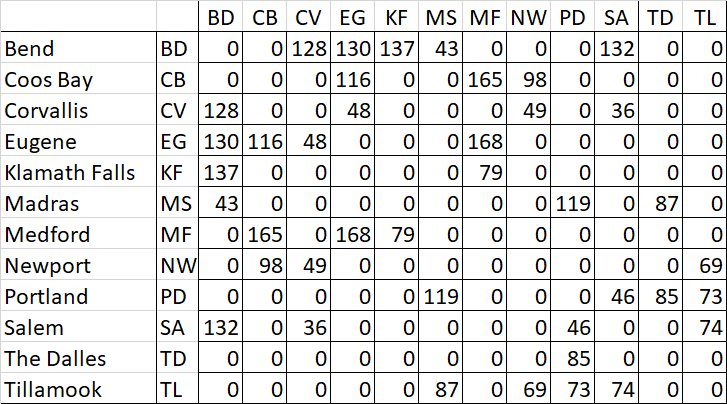

In [ ]:
# oregon graph
g = Graph(12)
m = [[0,0,128,130,137,43,0,0,0,132,0,0],
    [0,0,0,116,0,0,165,98,0,0,0,0],
    [128,0,0,48,0,0,0,49,0,36,0,0],
    [130,116,48,0,0,0,168,0,0,0,0,0],
    [137,0,0,0,0,0,79,0,0,0,0,0],
    [43,0,0,0,0,0,0,0,119,0,87,0],
    [0,165,0,168,79,0,0,0,0,0,0,0],
    [0,98,49,0,0,0,0,0,0,0,0,69],
    [0,0,0,0,0,119,0,0,0,46,85,73],
    [132,0,36,0,0,0,0,0,46,0,0,74],
    [0,0,0,0,0,0,0,0,85,0,0,0],
    [0,0,0,0,0,87,0,69,73,74,0,0]]
g.set_adj_matrix(m)

#### Dijkstra's Self-Check

In [ ]:
# run Dijkstra's algorithm
import time
t = time.process_time()
path = g.dijkstra(0)
print ("Dijkstra's path is", path)
assert path == [0, 246, 128, 130, 137, 43, 216, 177, 162, 132, 130, 206], "Failed Dijkstra's Test"
print("Passed Dijkstra's Test in", '{:.5f}'.format(time.process_time()-t), 'seconds')

vertex	distance
0 	 0
1 	 246
2 	 128
3 	 130
4 	 137
5 	 43
6 	 216
7 	 177
8 	 162
9 	 132
10 	 130
11 	 206
Dijkstra's path is [0, 246, 128, 130, 137, 43, 216, 177, 162, 132, 130, 206]
Passed Dijkstra's Test in 0.00644 seconds


#### Bellman-Ford Self-Check

In [ ]:
# run Bellman-Ford's algorithm
import time
t = time.process_time()
path = g.bellmanFord(0)
print ("Bellman-Ford path is", path)
assert path == [0, 246, 128, 130, 137, 43, 216, 177, 162, 132, 130, 206], "Failed Bellman-Ford Test"
print("Passed Bellman-Ford Test in", '{:.5f}'.format(time.process_time()-t), 'seconds')

vertex	distance
0 	 0
1 	 246
2 	 128
3 	 130
4 	 137
5 	 43
6 	 216
7 	 177
8 	 162
9 	 132
10 	 130
11 	 206
Bellman-Ford path is [0, 246, 128, 130, 137, 43, 216, 177, 162, 132, 130, 206]
Passed Bellman-Ford Test in 0.00612 seconds


# Part II: Evaluation Graphs

For evaluation, your implementation of Dijkstra's algorithm and the Bellman-Ford algorithm will be tested on the following two graphs.

You do not need to write any code in this section. Ensure your algorithms find a shortest path (answer not provided).

### Graph: Game of Thrones

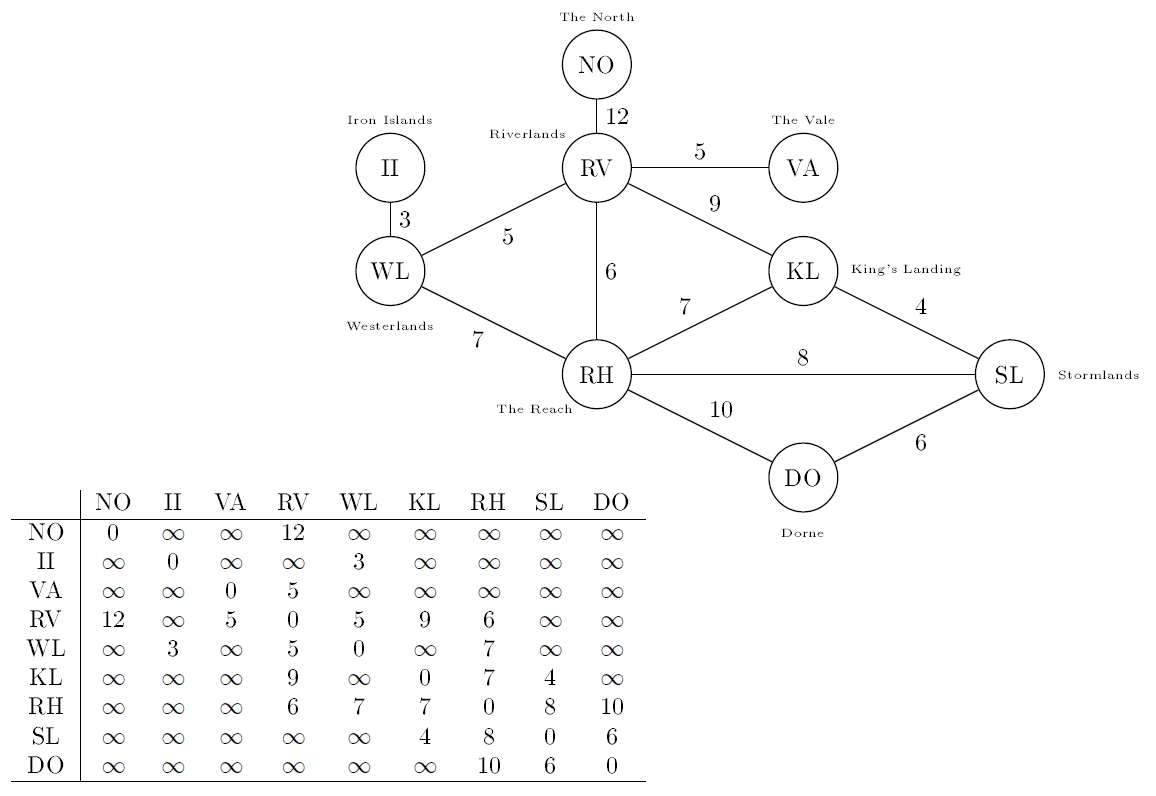

In [ ]:
g_got = Graph(9)
m_got = [[0,0,0,12,0,0,0,0,0],
          [0,0,0,0,3,0,0,0,0],
          [0,0,0,5,0,0,0,0,0],
          [12,0,5,0,5,9,6,0,0],
          [0,3,0,5,0,0,7,0,0],
          [0,0,0,9,0,0,7,4,0],
          [0,0,0,6,7,7,0,8,10],
          [0,0,0,0,0,4,8,0,6],
          [0,0,0,0,0,0,10,6,0]]
g_got.set_adj_matrix(m_got)

In [ ]:
# Dijkstra's Test
path = g_got.dijkstra(0)
print(path)

vertex	distance
0 	 0
1 	 20
2 	 17
3 	 12
4 	 17
5 	 21
6 	 18
7 	 25
8 	 28
[0, 20, 17, 12, 17, 21, 18, 25, 28]


In [ ]:
# Bellman Ford Test
path = g_got.bellmanFord(2)
print(path)

vertex	distance
0 	 17
1 	 13
2 	 0
3 	 5
4 	 10
5 	 14
6 	 11
7 	 18
8 	 21
[17, 13, 0, 5, 10, 14, 11, 18, 21]


#### Graph: Middle Earth

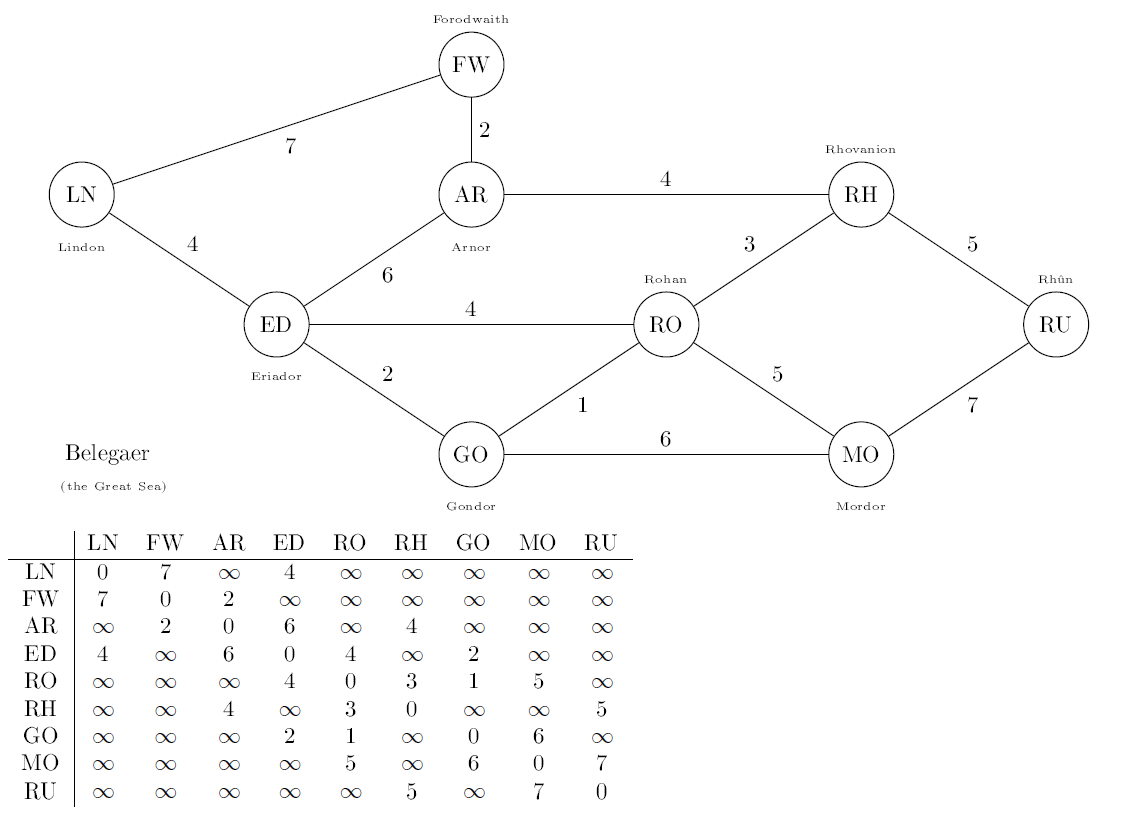

In [ ]:
g_lotr = Graph(9)
m_lotr = [[0,7,0,4,0,0,0,0,0],
          [7,0,2,0,0,0,0,0,0],
          [0,2,0,6,0,4,0,0,0],
          [4,0,6,0,4,0,2,0,0],
          [0,0,0,4,0,3,1,5,0],
          [0,0,4,0,3,0,0,0,5],
          [0,0,0,2,1,0,0,6,0],
          [0,0,0,0,5,0,6,0,7],
          [0,0,0,0,0,5,0,7,0]]
g_lotr.set_adj_matrix(m_lotr)

In [ ]:
# Dijkstra's Test
path = g_lotr.dijkstra(2)
print(path)

vertex	distance
0 	 9
1 	 2
2 	 0
3 	 6
4 	 7
5 	 4
6 	 8
7 	 12
8 	 9
[9, 2, 0, 6, 7, 4, 8, 12, 9]


In [ ]:
# Bellman Ford Test
path = g_lotr.bellmanFord(0)
print(path)

vertex	distance
0 	 0
1 	 7
2 	 9
3 	 4
4 	 7
5 	 10
6 	 6
7 	 12
8 	 15
[0, 7, 9, 4, 7, 10, 6, 12, 15]
